## Normality Tests

### Benchmark Case

In [1006]:
import math
import numpy as np
import scipy.stats as scs
import statsmodels.api as sm
from pylab import mpl, plt

### Real World Data

In [1007]:
import pandas as pd
import yfinance as yf

In [1008]:
# input
symbols = ['TSLA','RIOT','FCEL','KNDI', 'JMIA']
start = '2020-01-01'
end = '2020-11-26'

# Read data 
data = yf.download(symbols,start,end)['Adj Close']

[*********************100%***********************]  5 of 5 completed


In [1009]:
data.head()

,FCEL,JMIA,KNDI,RIOT,TSLA
Date,,,,,
2020-01-02,2.01,6.60,4.85,1.22,86.052002
2020-01-03,2.06,6.51,4.81,1.18,88.601997
2020-01-06,2.22,6.40,4.81,1.30,90.307999
2020-01-07,2.08,6.31,4.71,1.49,93.811996
2020-01-08,2.29,6.25,4.65,1.37,98.428001


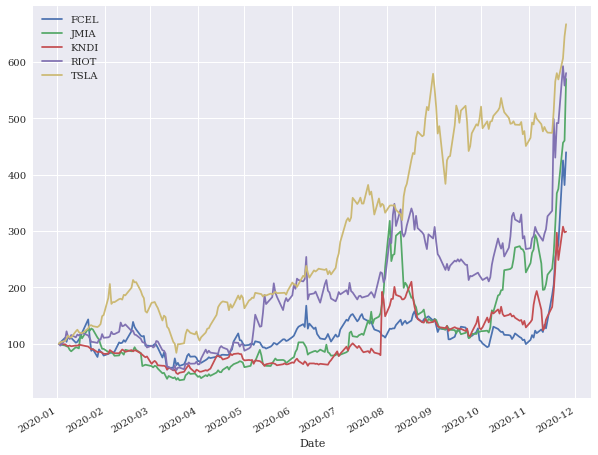

In [1010]:
(data / data.iloc[0] * 100).plot(figsize=(10, 8))

In [1011]:
log_returns = np.log(data / data.shift(1))
log_returns.head()

,FCEL,JMIA,KNDI,RIOT,TSLA
Date,,,,,
2020-01-02,NaN,NaN,NaN,NaN,NaN
2020-01-03,0.024571,-0.013730,-0.008282,-0.033336,0.029203
2020-01-06,0.074801,-0.017041,0.000000,0.096850,0.019072
2020-01-07,-0.065139,-0.014162,-0.021009,0.136412,0.038067
2020-01-08,0.096184,-0.009554,-0.012821,-0.083965,0.048033


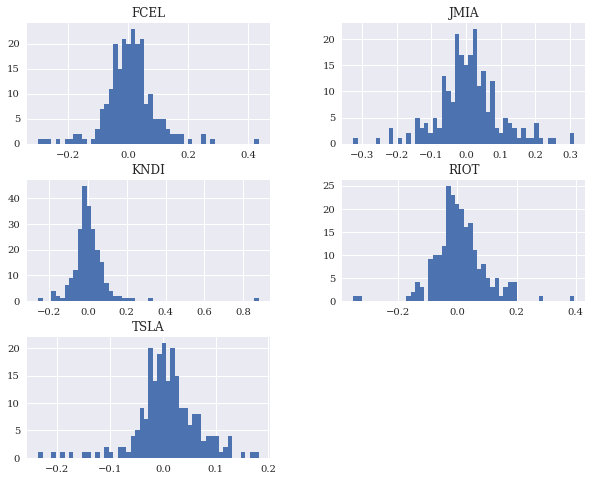

In [1012]:
log_returns.hist(bins=50, figsize=(10, 8));

In [1013]:
for sym in symbols:
    print('\nResults for symbol {}'.format(sym))
    print(30 * '-')
    log_data = np.array(log_returns[sym].dropna())
    print_statistics(log_data)  


Results for symbol TSLA
------------------------------
     statistic           value
------------------------------
          size       228.00000
           min        -0.23652
           max         0.18145
          mean         0.00832
           std         0.05822
          skew        -0.53814
      kurtosis         2.66603

Results for symbol RIOT
------------------------------
     statistic           value
------------------------------
          size       228.00000
           min        -0.35208
           max         0.39484
          mean         0.00771
           std         0.08414
          skew         0.19397
      kurtosis         3.74519

Results for symbol FCEL
------------------------------
     statistic           value
------------------------------
          size       228.00000
           min        -0.29908
           max         0.43394
          mean         0.00650
           std         0.08615
          skew         0.25343
      kurtosis         4.0

In [1014]:
sm.qqplot(log_returns['SPY'].dropna(), line='s')
plt.title('SPY')
plt.xlabel('theoretical quantiles')
plt.ylabel('sample quantiles');

KeyError: 'SPY'

In [ ]:
sm.qqplot(log_returns['SPY'].dropna(), line='s')
plt.title('SPY')
plt.xlabel('theoretical quantiles')
plt.ylabel('sample quantiles');

In [ ]:
for sym in symbols:
    print('\nResults for symbol {}'.format(sym))
    print(32 * '-')
    log_data = np.array(log_returns[sym].dropna())
    normality_tests(log_data)  

## Portfolio Optimization

### The Data

In [ ]:
symbols = ['SPY', 'GLD', 'AAPL', 'MSFT']  

In [ ]:
noa = len(symbols)  

In [ ]:
data = yf.download(symbols,start,end)['Adj Close']

In [ ]:
rets = np.log(data / data.shift(1))

In [ ]:
rets.hist(bins=40, figsize=(10, 8));
# plt.savefig('../../images/ch13/stat_11.png')

In [ ]:
rets.mean() * 252  

In [ ]:
rets.cov() * 252  

### The Basic Theory

In [ ]:
weights = np.random.random(noa)  
weights /= np.sum(weights)  

In [ ]:
weights

In [ ]:
weights.sum()

In [ ]:
np.sum(rets.mean() * weights) * 252  

In [ ]:
np.dot(weights.T, np.dot(rets.cov() * 252, weights))  

In [ ]:
math.sqrt(np.dot(weights.T, np.dot(rets.cov() * 252, weights)))  

In [ ]:
def port_ret(weights):
    return np.sum(rets.mean() * weights) * 252

In [ ]:
def port_vol(weights):
    return np.sqrt(np.dot(weights.T, np.dot(rets.cov() * 252, weights)))

In [ ]:
prets = []
pvols = []
for p in range (2500):  
    weights = np.random.random(noa)  
    weights /= np.sum(weights)  
    prets.append(port_ret(weights))  
    pvols.append(port_vol(weights))  
prets = np.array(prets)
pvols = np.array(pvols)

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(pvols, prets, c=prets / pvols,
            marker='o', cmap='coolwarm')
plt.xlabel('expected volatility')
plt.ylabel('expected return')
plt.colorbar(label='Sharpe ratio');
# plt.savefig('../../images/ch13/stat_12.png')

### Portfolio Optimizations

In [ ]:
import scipy.optimize as sco

In [ ]:
def min_func_sharpe(weights):  
    return -port_ret(weights) / port_vol(weights)  

In [ ]:
cons = ({'type': 'eq', 'fun': lambda x:  np.sum(x) - 1})  

In [ ]:
bnds = tuple((0, 1) for x in range(noa))  

In [ ]:
eweights = np.array(noa * [1. / noa,])  
eweights  

In [ ]:
min_func_sharpe(eweights)

In [ ]:
%%time
opts = sco.minimize(min_func_sharpe, eweights,
                    method='SLSQP', bounds=bnds,
                    constraints=cons)  

In [ ]:
opts  

In [ ]:
opts['x'].round(3)  

In [ ]:
port_ret(opts['x']).round(3)  

In [ ]:
port_vol(opts['x']).round(3)  

In [ ]:
port_ret(opts['x']) / port_vol(opts['x'])  

In [ ]:
optv = sco.minimize(port_vol, eweights,
                    method='SLSQP', bounds=bnds,
                    constraints=cons)  

In [ ]:
optv

In [ ]:
optv['x'].round(3)

In [ ]:
port_vol(optv['x']).round(3)

In [ ]:
port_ret(optv['x']).round(3)

In [ ]:
port_ret(optv['x']) / port_vol(optv['x'])

### Efficient Frontier

In [ ]:
cons = ({'type': 'eq', 'fun': lambda x:  port_ret(x) - tret},
        {'type': 'eq', 'fun': lambda x:  np.sum(x) - 1})  

In [ ]:
bnds = tuple((0, 1) for x in weights)

In [ ]:
%%time
trets = np.linspace(0.05, 0.2, 50)
tvols = []
for tret in trets:
    res = sco.minimize(port_vol, eweights, method='SLSQP',
                       bounds=bnds, constraints=cons)  
    tvols.append(res['fun'])
tvols = np.array(tvols)

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(pvols, prets, c=prets / pvols,
            marker='.', alpha=0.8, cmap='coolwarm')
plt.plot(tvols, trets, 'b', lw=4.0)
plt.plot(port_vol(opts['x']), port_ret(opts['x']),
         'y*', markersize=15.0)
plt.plot(port_vol(optv['x']), port_ret(optv['x']),
         'r*', markersize=15.0)
plt.xlabel('expected volatility')
plt.ylabel('expected return')
plt.colorbar(label='Sharpe ratio')
# plt.savefig('../../images/ch13/stat_13.png')

### Capital Market Line

In [ ]:
import scipy.interpolate as sci

In [ ]:
ind = np.argmin(tvols)  
evols = tvols[ind:]  
erets = trets[ind:]  

In [ ]:
tck = sci.splrep(evols, erets)  

In [ ]:
def f(x):
    ''' Efficient frontier function (splines approximation). '''
    return sci.splev(x, tck, der=0)
def df(x):
    ''' First derivative of efficient frontier function. '''
    return sci.splev(x, tck, der=1)

In [ ]:
def equations(p, rf=0.01):
    eq1 = rf - p[0]  
    eq2 = rf + p[1] * p[2] - f(p[2])  
    eq3 = p[1] - df(p[2])  
    return eq1, eq2, eq3

In [ ]:
opt = sco.fsolve(equations, [0.01, 0.5, 0.15])  

In [ ]:
opt  

In [ ]:
np.round(equations(opt), 6)  

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(pvols, prets, c=(prets - 0.01) / pvols,
            marker='.', cmap='coolwarm')
plt.plot(evols, erets, 'b', lw=4.0)
cx = np.linspace(0.0, 0.3)
plt.plot(cx, opt[0] + opt[1] * cx, 'r', lw=1.5)
plt.plot(opt[2], f(opt[2]), 'y*', markersize=15.0) 
plt.grid(True)
plt.axhline(0, color='k', ls='--', lw=2.0)
plt.axvline(0, color='k', ls='--', lw=2.0)
plt.xlabel('expected volatility')
plt.ylabel('expected return')
plt.colorbar(label='Sharpe ratio')
# plt.savefig('../../images/ch13/stat_14.png')

In [ ]:
cons = ({'type': 'eq', 'fun': lambda x:  port_ret(x) - f(opt[2])},
        {'type': 'eq', 'fun': lambda x:  np.sum(x) - 1})  
res = sco.minimize(port_vol, eweights, method='SLSQP',
                   bounds=bnds, constraints=cons)

In [ ]:
res['x'].round(3)  

In [ ]:
port_ret(res['x'])

In [ ]:
port_vol(res['x'])

In [ ]:
port_ret(res['x']) / port_vol(res['x'])